In [1]:
%%capture --no-stdout
%reload_ext watermark
%watermark -uniz --author "Prayson W. Daniel" -vm -p pandas,pymc,scikit-learn,latexify-py

Author: Prayson W. Daniel

Last updated: 2024-12-10T16:58:49.266131+01:00

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 8.30.0

pandas      : 2.2.3
pymc        : 5.19.1
scikit-learn: 1.6.0
latexify-py : not installed

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 23.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit



In [2]:
import latexify

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


pd.options.plotting.backend = "plotly"

ADS_DATA_RI = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"

dataf = pd.read_csv(ADS_DATA_RI, index_col=0)

# split my data to test the performance of the model
X, y = dataf[["TV"]], dataf["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=7)


In [62]:
def latex(fn):
    fn.latex = latexify.function(fn)
    return fn

@latex
def LSCE(X, y):
    "Linear Regression ISLP pg. 71 + log for bending data"
    X, y = np.log(X), np.log(y)
    return ((np.sum((X - X.mean())*(y - y.mean())) / np.sum((X - X.mean())**2)), 
            (y.mean()- (np.sum((X - X.mean())*(y - y.mean())) / np.sum((X - X.mean())**2))*X.mean()))
    
LSCE.latex

In [63]:
β1, β0 = LSCE(X=X_train["TV"], y=y_train)

In [64]:
@latex
def reg(X, β=β1, c=β0):
    X = np.log(X)
    return np.exp(X*β + c).round(1)

reg.latex

In [58]:
from sklearn.metrics import root_mean_squared_error, r2_score

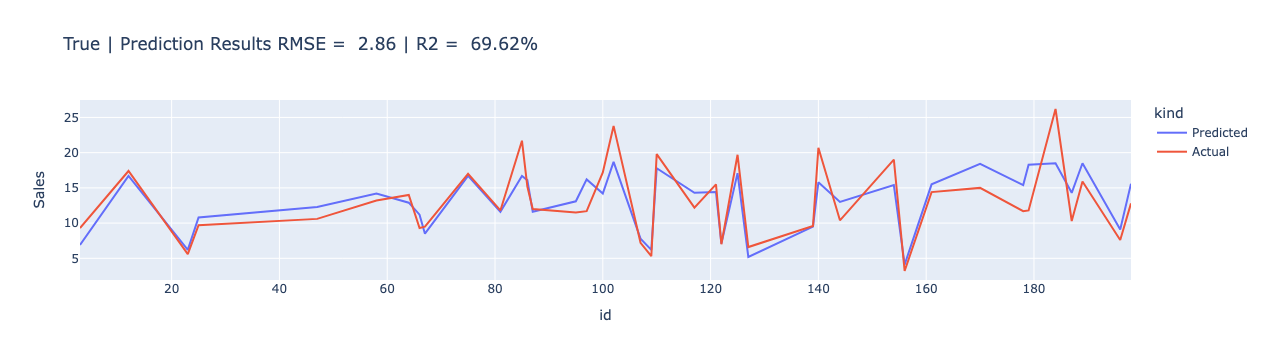

In [65]:

stats = f'RMSE = {root_mean_squared_error(y_test, reg(X_test["TV"])): .2f} | R2 = {r2_score(y_test, reg(X_test["TV"])): .2%}'

(pd.concat( 
    (pd.DataFrame(y_test).reset_index(names=["id"]).assign(kind=lambda _: "Actual"),
        pd.DataFrame(reg(X_test["TV"])).reset_index(names=["id"]).rename(columns={"TV": "Sales"}).assign(kind=lambda _: "Predicted")
    )
).sort_values(by="id").plot(x="id", y="Sales", color="kind", title=f'True | Prediction Results {stats}')
)

In [135]:
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import GradientBoostingRegressor


In [137]:
lr = LinearRegression().fit(X_train.map(np.log), np.log(y_train))
# rg = GradientBoostingRegressor(n_estimators=42, learning_rate=0.1, random_state=42).fit(X_train.map(np.log), np.log(y_train))

In [138]:
pred = np.exp(lr.predict(X_test.map(np.log))).round(1)


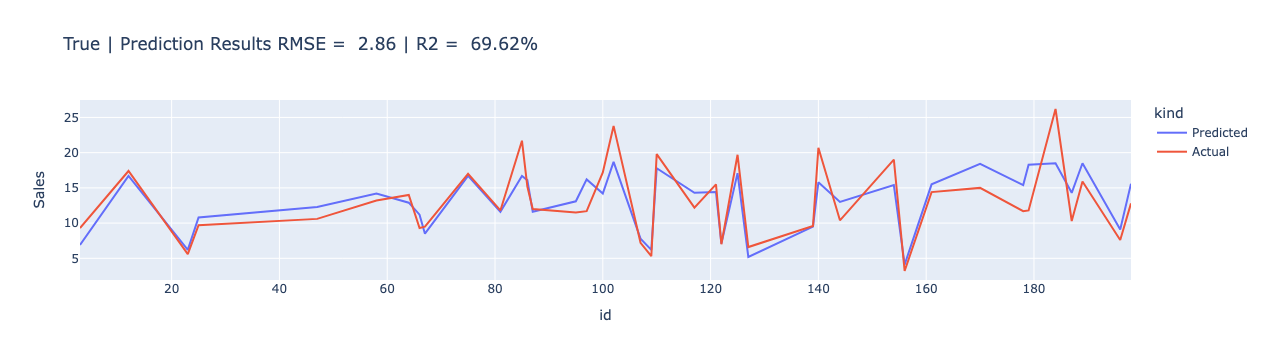

In [139]:
stats = f'RMSE = {root_mean_squared_error(y_test, pred): .2f} | R2 = {r2_score(y_test, pred): .2%}'

(pd.concat( 
    (pd.DataFrame(y_test).reset_index(names=["id"]).assign(kind=lambda _: "Actual"),
        pd.DataFrame(pred).assign(id=lambda _: X_test.index).rename(columns={0: "Sales"}).assign(kind=lambda _: "Predicted")
    )
).sort_values(by="id").plot(x="id", y="Sales", color="kind", title=f'True | Prediction Results {stats}')
)